Load all the required modeules

Dataset source: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

Load the datatset and then analyze it to get a better understanding of the data.

The cifar10.load_data() returns the dataset by splitting it to train and test data.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Understanding the size and datatype for the given dataset.

In [ ]:
print('Shape of Train data')
print(x_train.shape)
print(y_train.shape)
print('Shape of Test data')
print(x_test.shape)
print(y_test.shape)
print("Data type of the given data set")
print(type(x_train))
print("Data type of images in the given data set")
print(x_train.dtype)

Shape of Train data
(50000, 32, 32, 3)
(50000, 1)
Shape of Test data
(10000, 32, 32, 3)
(10000, 1)
Data type of the given data set
<class 'numpy.ndarray'>
Data type of images in the given data set
uint8


Check for any null values within the dataset

In [ ]:
print("Null valus in x_train: ",np.sum(x_train == None))
print("Null valus in y_train: ",np.sum(y_train == None))
print("Null valus in x_test: ",np.sum(x_test == None))
print("Null valus in y_test: ",np.sum(x_test == None))

Null valus in x_train:  0
Null valus in y_train:  0
Null valus in x_test:  0
Null valus in y_test:  0


Find all the unique classes and their distribution

Classes in the dataset:
 [0 1 2 3 4 5 6 7 8 9]


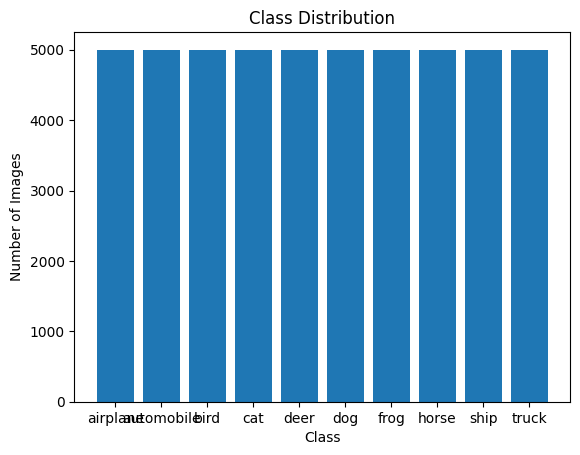

In [ ]:
print("Classes in the dataset:\n",np.unique(y_train))

# Count the number of images in each class
class_dist = np.bincount(y_train[:,0])

# Define class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Plot a bar chart of class distribution
plt.bar(class_names, class_dist)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

Find the distribution of data

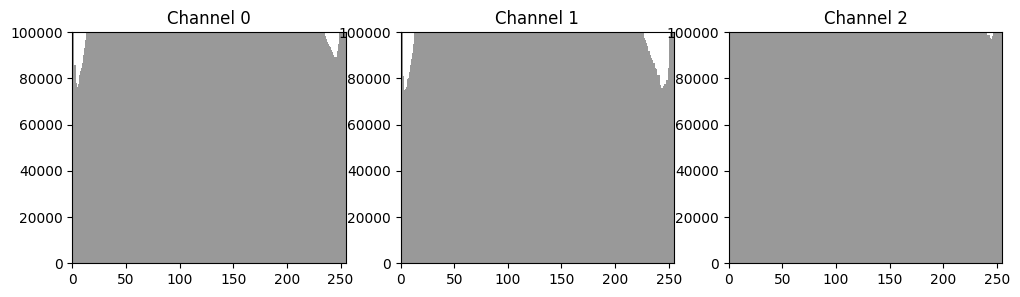

In [ ]:
# Plot histograms of pixel values for each color channel
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for i in range(3):
    ax = axes[i]
    ax.hist(x_train[:,:,:,i].ravel(), bins=256, color="gray", alpha=0.8)
    ax.set_xlim([0, 255])
    ax.set_ylim([0, 100000])
    ax.set_title(f"Channel {i}")
plt.show()


Tiny image representaion of the dataset with resolution 32x32.

In [ ]:

# import matplotlib.pyplot as plt
# import numpy as np

# class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# # Plot some random images
# num_rows, num_cols = 2, 5
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*2))
# for i in range(num_rows*num_cols):
#     ax = axes[i//num_cols, i%num_cols]
#     image = x_train[np.random.randint(0, x_train.shape[0])]
#     label = class_names[int(y_train[i])]
#     ax.imshow(image)
#     ax.set_title(label)
#     ax.axis("off")
# plt.tight_layout()
# plt.show()

Function to load data for the different classification algorithms. The dataset is first normalized. For all classification algorithms the dataset is reshaped to 2D.

In [ ]:
# Preprocess the data
def getData(isConv = False, isTest = False):

  # Load the CIFAR-10 dataset
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0

  if isConv:
    # y_train = to_categorical(y_train, num_classes=10)
    # y_test = to_categorical(y_test, num_classes=10)
    pass

  else:
    x_train = np.reshape(x_train, (len(x_train), -1))
    x_test = np.reshape(x_test, (len(x_test), -1))

  if isTest:
    x_train = x_train[:100,:]
    y_train = y_train[:100,:]
    x_test = x_test[1:100,:]
    y_test = y_test[1:100,:]
  else:
    x_train = x_train[:10000,:]
    y_train = y_train[:10000,:]
    x_test = x_test[1:1000,:]
    y_test = y_test[1:1000,:]

  return x_train, y_train, x_test, y_test

K-Nearest Neighbor

In [ ]:
x_train, y_train, x_test, y_test = getData(False)
class_count = len(np.unique(y_train))
neighbors = range( 1, 15, 2 )
weights =['uniform', 'distance']
p=[1,2]
knn_report = []

for n in neighbors:
  for w in weights:
    for i in p:
      # Create a k-NN classifier
      knn = KNeighborsClassifier(n_neighbors=n, weights=w, p=i, metric="minkowski")

      # Fit the k-NN classifier to the training data
      knn.fit(x_train, np.reshape(y_train, (len(y_train), )))

      # Make predictions on the test data
      y_pred_train = knn.predict(x_train)
      accuracyTrain = accuracy_score(y_train, y_pred_train)

      # Make predictions on the test data
      y_pred = knn.predict(x_test)

      # Calculate the accuracy of the classifier
      accuracy = accuracy_score(y_test, y_pred)
      record = {
        'neigbours': n,
        'weights': w,
        'p': i,
        'accuracy': accuracy,
        'trainAccuracy': accuracyTrain
      }
      knn_report.append(record)
      print(record)

Plot the results

p = 1 -> Manhattan Distance
p = 2 -> Euclidean Disatance

weights = unifrom -> Assigns uniform distance
weights = distance -> Assigns higher weights to closest points

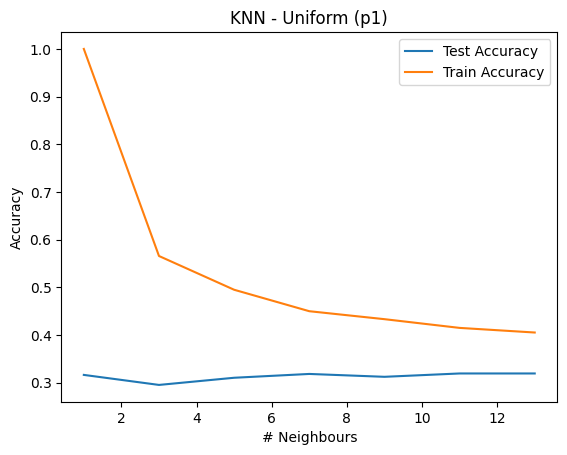

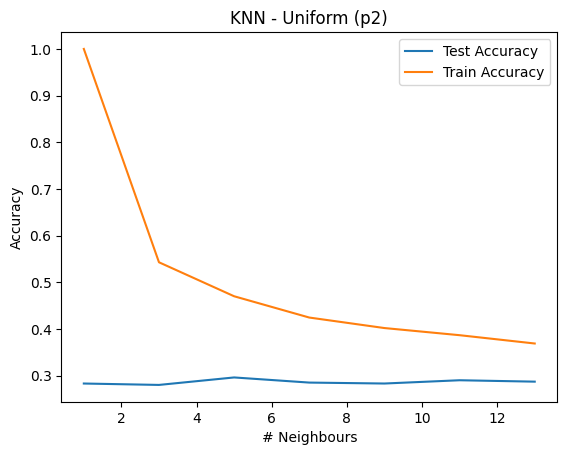

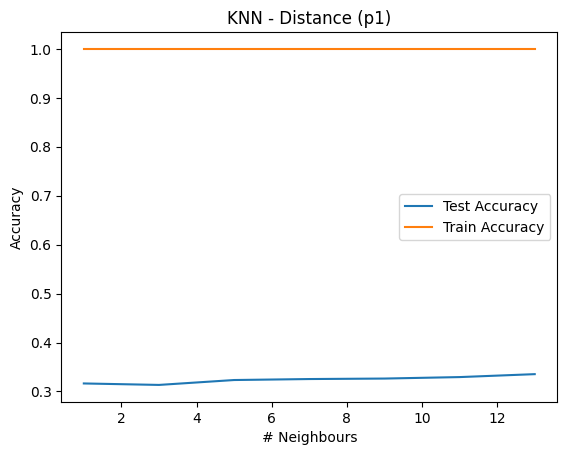

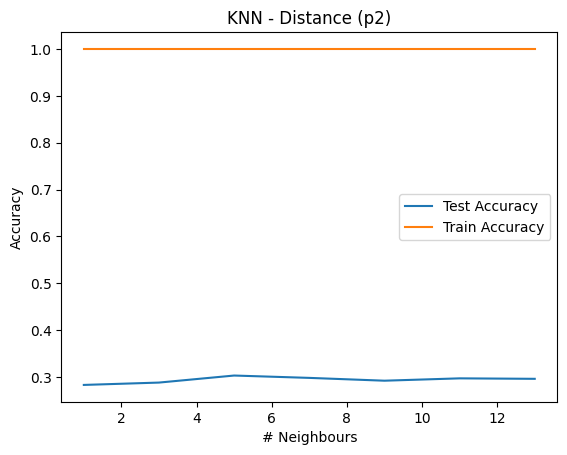

In [ ]:
knn_report =  [{'neigbours': 1, 'weights': 'uniform', 'p': 1, 'accuracy': 0.3163163163163163, 'trainAccuracy': 1.0}, {'neigbours': 1, 'weights': 'uniform', 'p': 2, 'accuracy': 0.2832832832832833, 'trainAccuracy': 1.0}, {'neigbours': 1, 'weights': 'distance', 'p': 1, 'accuracy': 0.3163163163163163, 'trainAccuracy': 1.0}, {'neigbours': 1, 'weights': 'distance', 'p': 2, 'accuracy': 0.2832832832832833, 'trainAccuracy': 1.0}, {'neigbours': 3, 'weights': 'uniform', 'p': 1, 'accuracy': 0.2952952952952953, 'trainAccuracy': 0.5657}, {'neigbours': 3, 'weights': 'uniform', 'p': 2, 'accuracy': 0.2802802802802803, 'trainAccuracy': 0.543}, {'neigbours': 3, 'weights': 'distance', 'p': 1, 'accuracy': 0.3133133133133133, 'trainAccuracy': 1.0}, {'neigbours': 3, 'weights': 'distance', 'p': 2, 'accuracy': 0.2882882882882883, 'trainAccuracy': 1.0}, {'neigbours': 5, 'weights': 'uniform', 'p': 1, 'accuracy': 0.3103103103103103, 'trainAccuracy': 0.4949}, {'neigbours': 5, 'weights': 'uniform', 'p': 2, 'accuracy': 0.2962962962962963, 'trainAccuracy': 0.4702}, {'neigbours': 5, 'weights': 'distance', 'p': 1, 'accuracy': 0.3233233233233233, 'trainAccuracy': 1.0}, {'neigbours': 5, 'weights': 'distance', 'p': 2, 'accuracy': 0.3033033033033033, 'trainAccuracy': 1.0}, {'neigbours': 7, 'weights': 'uniform', 'p': 1, 'accuracy': 0.3183183183183183, 'trainAccuracy': 0.4499}, {'neigbours': 7, 'weights': 'uniform', 'p': 2, 'accuracy': 0.2852852852852853, 'trainAccuracy': 0.4246}, {'neigbours': 7, 'weights': 'distance', 'p': 1, 'accuracy': 0.3253253253253253, 'trainAccuracy': 1.0}, {'neigbours': 7, 'weights': 'distance', 'p': 2, 'accuracy': 0.2982982982982983, 'trainAccuracy': 1.0}, {'neigbours': 9, 'weights': 'uniform', 'p': 1, 'accuracy': 0.3123123123123123, 'trainAccuracy': 0.4332}, {'neigbours': 9, 'weights': 'uniform', 'p': 2, 'accuracy': 0.2832832832832833, 'trainAccuracy': 0.4021}, {'neigbours': 9, 'weights': 'distance', 'p': 1, 'accuracy': 0.3263263263263263, 'trainAccuracy': 1.0}, {'neigbours': 9, 'weights': 'distance', 'p': 2, 'accuracy': 0.2922922922922923, 'trainAccuracy': 1.0}, {'neigbours': 11, 'weights': 'uniform', 'p': 1, 'accuracy': 0.31931931931931934, 'trainAccuracy': 0.4149}, {'neigbours': 11, 'weights': 'uniform', 'p': 2, 'accuracy': 0.2902902902902903, 'trainAccuracy': 0.3868}, {'neigbours': 11, 'weights': 'distance', 'p': 1, 'accuracy': 0.32932932932932935, 'trainAccuracy': 1.0}, {'neigbours': 11, 'weights': 'distance', 'p': 2, 'accuracy': 0.2972972972972973, 'trainAccuracy': 1.0}, {'neigbours': 13, 'weights': 'uniform', 'p': 1, 'accuracy': 0.31931931931931934, 'trainAccuracy': 0.4052}, {'neigbours': 13, 'weights': 'uniform', 'p': 2, 'accuracy': 0.2872872872872873, 'trainAccuracy': 0.369}, {'neigbours': 13, 'weights': 'distance', 'p': 1, 'accuracy': 0.3353353353353353, 'trainAccuracy': 1.0}, {'neigbours': 13, 'weights': 'distance', 'p': 2, 'accuracy': 0.2962962962962963, 'trainAccuracy': 1.0}]

def plotGraph(dataset, title):
  x = [item['neigbours'] for item in dataset]
  y1 = [item['accuracy'] for item in dataset]
  y2 = [item['trainAccuracy'] for item in dataset]

  plt.plot(x, y1)
  plt.plot(x, y2)
  plt.legend(['Test Accuracy','Train Accuracy'])

  plt.title(title)
  plt.xlabel("# Neighbours")
  plt.ylabel("Accuracy")
  plt.show()

uniformDataset = [x for x in knn_report if x['weights'] == 'uniform']
uniformp1Dataset = [x for x in uniformDataset if x['p'] == 1]
plotGraph(uniformp1Dataset, 'KNN - Uniform (p1)')

uniformp2Dataset = [x for x in uniformDataset if x['p'] == 2]
plotGraph(uniformp2Dataset, 'KNN - Uniform (p2)')

distanceDataset = [x for x in knn_report if x['weights'] == 'distance']
distancep1Dataset = [x for x in distanceDataset if x['p'] == 1]
plotGraph(distancep1Dataset, 'KNN - Distance (p1)')

distancep2Dataset = [x for x in distanceDataset if x['p'] == 2]
plotGraph(distancep2Dataset, 'KNN - Distance (p2)')



Support Vector Machines(SVM)

In [ ]:
# Play with Gamma, Coef, and kernel types
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

svc_report = []

def performSVC(penalty, loss, reg_val):
  x_train, y_train, x_test, y_test = getData(False)

  print(penalty, loss, reg_val)

  svm = LinearSVC(penalty=penalty, loss=loss, C=reg_val)

  # Fit the SVM classifier to the training data
  svm.fit(x_train, y_train.ravel())

  # Make predictions on the train data
  y_pred_train = svm.predict(x_train)

  # Calculate the accuracy of the train classifier
  accuracySVM_train = accuracy_score(y_train, y_pred_train)

  # Make predictions on the test data
  y_pred = svm.predict(x_test)

  # Calculate the accuracy of the classifier
  accuracySVM = accuracy_score(y_test, y_pred)

  svc_report.append({
      'penalty': penalty,
      'loss': loss,
      'regValue': reg_val,
      'accuracy': accuracySVM,
      'trainAccuracy': accuracySVM_train
  })
  print(svc_report)

  return True

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

# Types:
penalty = ['l2']
loss = ['hinge', 'squared_hinge']
reg_para = [0.1, 1, 10]
for p in penalty:
  for l in loss:
    for r in reg_para:
      performSVC(p, l, r)

Plot the results

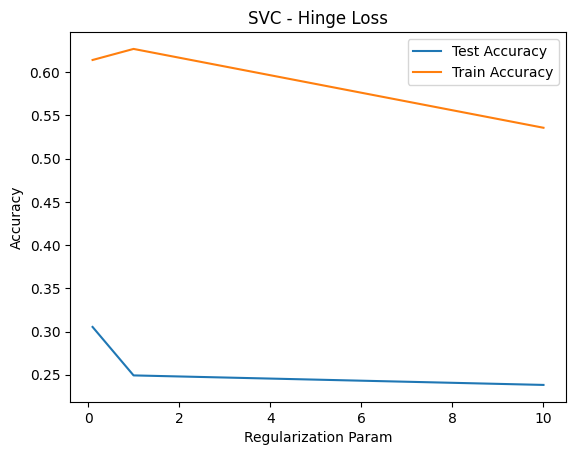

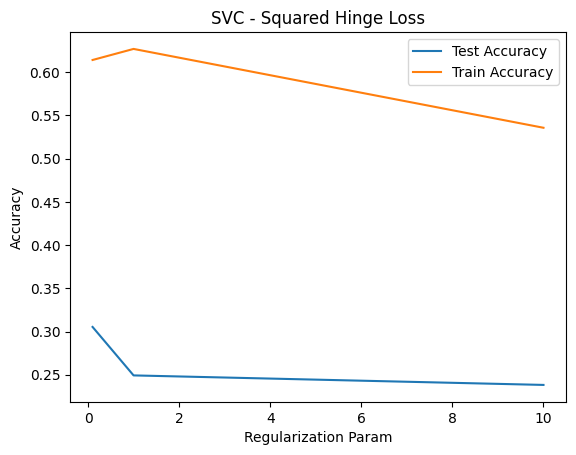

In [ ]:
svc_report = [{'penalty': 'l2', 'loss': 'hinge', 'regValue': 0.1, 'accuracy': 0.3053053053053053, 'trainAccuracy': 0.6141}, {'penalty': 'l2', 'loss': 'hinge', 'regValue': 1, 'accuracy': 0.24924924924924924, 'trainAccuracy': 0.6269}, {'penalty': 'l2', 'loss': 'hinge', 'regValue': 10, 'accuracy': 0.23823823823823823, 'trainAccuracy': 0.5357}, {'penalty': 'l2', 'loss': 'squared_hinge', 'regValue': 0.1, 'accuracy': 0.3053053053053053, 'trainAccuracy': 0.6655}, {'penalty': 'l2', 'loss': 'squared_hinge', 'regValue': 1, 'accuracy': 0.25625625625625625, 'trainAccuracy': 0.6757}, {'penalty': 'l2', 'loss': 'squared_hinge', 'regValue': 10, 'accuracy': 0.24224224224224225, 'trainAccuracy': 0.5333}]

def plotGraph(dataset, title):
  x = [item['regValue'] for item in dataset]
  y1 = [item['accuracy'] for item in dataset]
  y2 = [item['trainAccuracy'] for item in dataset]

  plt.plot(x, y1)
  plt.plot(x, y2)
  plt.legend(['Test Accuracy','Train Accuracy'])

  plt.title(title)
  plt.xlabel("Regularization Param")
  plt.ylabel("Accuracy")
  plt.show()

hingeDataset = [x for x in svc_report if x['loss'] == 'hinge']
plotGraph(hingeDataset, 'SVC - Hinge Loss')

sqHingeDataset = [x for x in svc_report if x['loss'] == 'squared_hinge']
plotGraph(hingeDataset, 'SVC - Squared Hinge Loss')




Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# split the data into training and testing sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = np.reshape(x_train, (len(x_train), -1))
x_test = np.reshape(x_test, (len(x_test), -1))

my_report = []

def performGNB(i):
  # create the Gaussian Naive Bayes model
  gnb = GaussianNB(var_smoothing=i)

  # perform grid search cross-validation
  gnb.fit(x_train, np.reshape(y_train, (len(y_train), )))

  # make predictions on the training set
  y_pred_train = gnb.predict(x_train)

  # calculate the accuracy of the model
  accuracy_train = accuracy_score(y_train, y_pred_train)

  # make predictions on the testing set
  y_pred = gnb.predict(x_test)

  # calculate the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)

  record = {
    'var_smoothing': i,
    'accuracy': accuracy,
    'trainAccuracy': accuracy_train
  }
  my_report.append(record)
  print(record)

var_smoothing = [1e-9, 1e-8, 1e-7, 1e-6]
priors= [None]
for i in var_smoothing:
    performGNB(i)

{'var_smoothing': 1e-09, 'accuracy': 0.2976, 'trainAccuracy': 0.28472}
{'var_smoothing': 1e-08, 'accuracy': 0.2976, 'trainAccuracy': 0.28472}
{'var_smoothing': 1e-07, 'accuracy': 0.2976, 'trainAccuracy': 0.28472}
{'var_smoothing': 1e-06, 'accuracy': 0.2976, 'trainAccuracy': 0.28472}


Plot the results

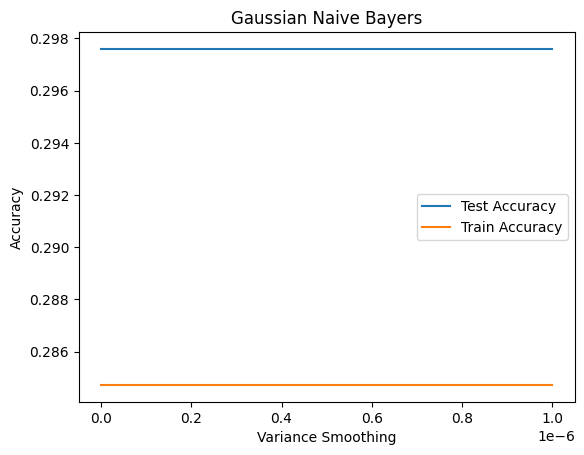

In [ ]:
my_report = [{'var_smoothing': 1e-09, 'accuracy': 0.2976, 'trainAccuracy': 0.28472},
{'var_smoothing': 1e-08, 'accuracy': 0.2976, 'trainAccuracy': 0.28472},
{'var_smoothing': 1e-07, 'accuracy': 0.2976, 'trainAccuracy': 0.28472},
{'var_smoothing': 1e-06, 'accuracy': 0.2976, 'trainAccuracy': 0.28472}]

def plotGraph(dataset, title):
  x = [item['var_smoothing'] for item in dataset]
  y1 = [item['accuracy'] for item in dataset]
  y2 = [item['trainAccuracy'] for item in dataset]

  plt.plot(x, y1)
  plt.plot(x, y2)
  plt.legend(['Test Accuracy','Train Accuracy'])

  plt.title(title)
  plt.xlabel("Variance Smoothing")
  plt.ylabel("Accuracy")
  plt.show()

plotGraph(my_report, 'Gaussian Naive Bayers')

Logistic Regression

In [ ]:
LR_report = []
def performLR(s, c, p):
  if((s == 'lbfgs' or s == 'newton-cholesky') and p == 'l1'):
    pass
  else:
    # Create a Logistic Regression classifier
    lr = LogisticRegression(penalty = p, C=c, solver=s, max_iter=5000, multi_class='auto')

    # Fit the Logistic Regression classifier to the training data
    lr.fit(x_train, np.reshape(y_train, (len(y_train),)))

    # Make predictions on the train data
    y_predTrain = lr.predict(x_train)

    # Make predictions on the test data
    y_pred = lr.predict(x_test)

    # Calculate the accuracy of the classifier
    accuracyTrainlr = accuracy_score(y_train, y_predTrain)
    accuracylr = accuracy_score(y_test, y_pred)
    LR_report.append({
    'solver': s,
    'C': c,
    'penalty': p,
    'accuracy': accuracylr,
    'trainAccuracy': accuracyTrainlr
    })
    print(LR_report)

# max_iters = [100, 500, 1000, 5000, 10000]
solver = ['lbfgs', 'liblinear']
C = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
penalty = ['l1', 'l2']

# for itr in max_iters:
for s in solver:
  for c in C:
    for p in penalty:
      performLR(s, c, p)

Plot the results

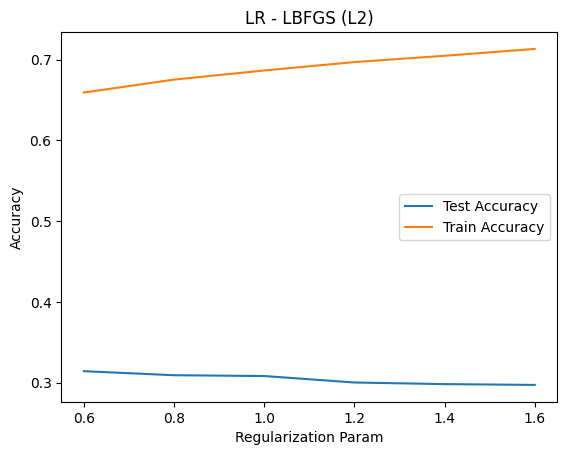

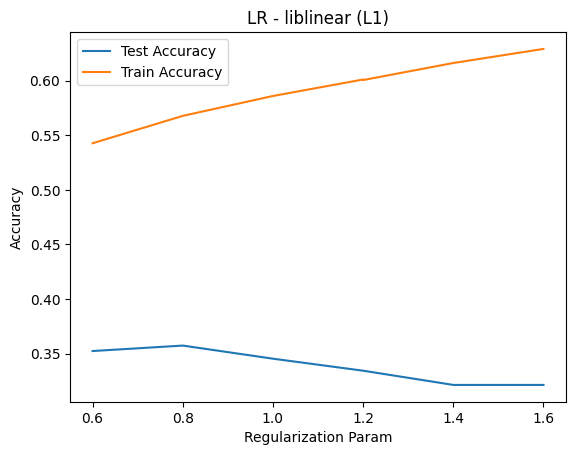

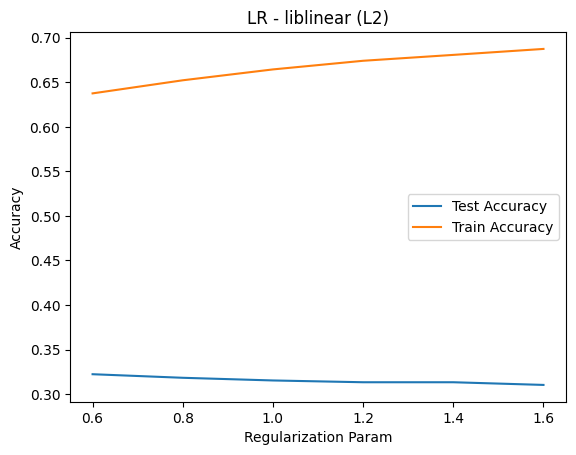

In [ ]:
LR_report = [{'solver': 'lbfgs', 'C': 0.6, 'penalty': 'l2', 'accuracy': 0.31431431431431434, 'trainAccuracy': 0.6593},{'solver': 'lbfgs', 'C': 0.8, 'penalty': 'l2', 'accuracy': 0.30930930930930933, 'trainAccuracy': 0.6753},{'solver': 'lbfgs', 'C': 1.0, 'penalty': 'l2', 'accuracy': 0.3083083083083083, 'trainAccuracy': 0.6866},{'solver': 'lbfgs', 'C': 1.2, 'penalty': 'l2', 'accuracy': 0.3003003003003003, 'trainAccuracy': 0.697},{'solver': 'lbfgs', 'C': 1.4, 'penalty': 'l2', 'accuracy': 0.2982982982982983, 'trainAccuracy': 0.7048},{'solver': 'lbfgs', 'C': 1.6, 'penalty': 'l2', 'accuracy': 0.2972972972972973, 'trainAccuracy': 0.7133},{'solver': 'liblinear', 'C': 0.6, 'penalty': 'l1', 'accuracy': 0.35235235235235235, 'trainAccuracy': 0.5426},{'solver': 'liblinear', 'C': 0.6, 'penalty': 'l2', 'accuracy': 0.32232232232232233, 'trainAccuracy': 0.6375},{'solver': 'liblinear', 'C': 0.8, 'penalty': 'l1', 'accuracy': 0.35735735735735735, 'trainAccuracy': 0.5677},{'solver': 'liblinear', 'C': 0.8, 'penalty': 'l2', 'accuracy': 0.3183183183183183, 'trainAccuracy': 0.6522},{'solver': 'liblinear', 'C': 1.0, 'penalty': 'l1', 'accuracy': 0.34534534534534533, 'trainAccuracy': 0.5859},{'solver': 'liblinear', 'C': 1.0, 'penalty': 'l2', 'accuracy': 0.3153153153153153, 'trainAccuracy': 0.6644},{'solver': 'liblinear', 'C': 1.2, 'penalty': 'l1', 'accuracy': 0.33433433433433435, 'trainAccuracy': 0.601},{'solver': 'liblinear', 'C': 1.2, 'penalty': 'l1', 'accuracy': 0.33433433433433435, 'trainAccuracy': 0.6005}, {'solver': 'liblinear', 'C': 1.2, 'penalty': 'l2', 'accuracy': 0.3133133133133133, 'trainAccuracy': 0.6741}, {'solver': 'liblinear', 'C': 1.4, 'penalty': 'l1', 'accuracy': 0.3213213213213213, 'trainAccuracy': 0.6161}, {'solver': 'liblinear', 'C': 1.4, 'penalty': 'l2', 'accuracy': 0.3133133133133133, 'trainAccuracy': 0.6807}, {'solver': 'liblinear', 'C': 1.6, 'penalty': 'l1', 'accuracy': 0.3213213213213213, 'trainAccuracy': 0.629}, {'solver': 'liblinear', 'C': 1.6, 'penalty': 'l2', 'accuracy': 0.3103103103103103, 'trainAccuracy': 0.6874}]

def plotGraph(dataset, title):
  x = [item['C'] for item in dataset]
  y1 = [item['accuracy'] for item in dataset]
  y2 = [item['trainAccuracy'] for item in dataset]

  plt.plot(x, y1)
  plt.plot(x, y2)
  plt.legend(['Test Accuracy','Train Accuracy'])

  plt.title(title)
  plt.xlabel("Regularization Param")
  plt.ylabel("Accuracy")
  plt.show()

filteredDataset = [x for x in LR_report if x['solver'] == 'lbfgs']
subFilteredDataset = [x for x in filteredDataset if x['penalty'] == 'l2']
plotGraph(subFilteredDataset, 'LR - LBFGS (L2)')

filteredDataset = [x for x in LR_report if x['solver'] == 'liblinear']
subFilteredDataset = [x for x in filteredDataset if x['penalty'] == 'l1']
plotGraph(subFilteredDataset, 'LR - liblinear (L1)')

subFilteredDataset = [x for x in filteredDataset if x['penalty'] == 'l2']
plotGraph(subFilteredDataset, 'LR - liblinear (L2)')


Random Forest Classifier

In [ ]:
x_train, y_train, x_test, y_test = getData(False, False)

RF_report = []
def performRF(n, c, d, m):
  # Create a Random Forest classifier
  rf = RandomForestClassifier(n_estimators=n, criterion = c,  max_depth=d, min_samples_split=m, random_state=42)

  # Fit the Random Forest classifier to the training data
  rf.fit(x_train, np.reshape(y_train, (len(y_train),)))

  # Make predictions on the test data
  y_predTrainrf = rf.predict(x_train)

  # Make predictions on the test data
  y_predrf = rf.predict(x_test)

  # Calculate the accuracy of the classifier
  accuracyTrainrf = accuracy_score(y_train, y_predTrainrf)
  accuracyrf = accuracy_score(y_test, y_predrf)
  record = {
    'num_of_tress': n,
    'criteria': c,
    'max_depth': d,
    'min_sapmles_split': m,
    'accuracy': accuracyrf,
    'trainAccuracy': accuracyTrainrf
  }
  RF_report.append(record)
  print(record)

# considering bootstrap dataset
criteria = ['gini', 'entropy', 'log_loss']
num_of_tress = [1, 10, 50, 100, 1000, 1500]
depth = range( 1, 100, 5 )
min_samples = [2,4,6,8,10]

for n in num_of_tress:
  for c in criteria:
    for d in depth:
      for m in min_sample:
        performRF(n, c, d, m)

Plot the results

In [ ]:
RF_report = [{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.2874, 'trainAccuracy': 0.37704}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.2854, 'trainAccuracy': 0.37856}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.2779, 'trainAccuracy': 0.3646}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.2833, 'trainAccuracy': 0.3576}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.2766, 'trainAccuracy': 0.35988}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.2574, 'trainAccuracy': 0.6897}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.2522, 'trainAccuracy': 0.53428}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.2627, 'trainAccuracy': 0.46726}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.2661, 'trainAccuracy': 0.43614}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.2716, 'trainAccuracy': 0.41544}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.2388, 'trainAccuracy': 0.71906}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.2531, 'trainAccuracy': 0.54222}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.2633, 'trainAccuracy': 0.47404}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.2699, 'trainAccuracy': 0.44102}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.2734, 'trainAccuracy': 0.41818}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.2495, 'trainAccuracy': 0.72136}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.2453, 'trainAccuracy': 0.53922}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.2602, 'trainAccuracy': 0.47422}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.2556, 'trainAccuracy': 0.43518}, {'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.2583, 'trainAccuracy': 0.41636}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.2694, 'trainAccuracy': 0.3954}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.2809, 'trainAccuracy': 0.38172}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.2717, 'trainAccuracy': 0.36254}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.2744, 'trainAccuracy': 0.35466}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.2761, 'trainAccuracy': 0.344}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.2441, 'trainAccuracy': 0.7132}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.2501, 'trainAccuracy': 0.52804}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.2551, 'trainAccuracy': 0.4427}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.2627, 'trainAccuracy': 0.40832}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.2577, 'trainAccuracy': 0.38628}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.2617, 'trainAccuracy': 0.38536}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992}, {'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1541, 'trainAccuracy': 0.15354}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.2694, 'trainAccuracy': 0.3954}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.2809, 'trainAccuracy': 0.38172}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.2717, 'trainAccuracy': 0.36254}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.2744, 'trainAccuracy': 0.35466}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.2761, 'trainAccuracy': 0.344}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.2441, 'trainAccuracy': 0.7132}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.2501, 'trainAccuracy': 0.52804}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.2551, 'trainAccuracy': 0.4427}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.2627, 'trainAccuracy': 0.40832}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.2577, 'trainAccuracy': 0.38628}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.2617, 'trainAccuracy': 0.38536}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992}, {'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.4413, 'trainAccuracy': 0.73644}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.4377, 'trainAccuracy': 0.70018}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.4371, 'trainAccuracy': 0.66834}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.4344, 'trainAccuracy': 0.63884}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.4294, 'trainAccuracy': 0.61936}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.4667, 'trainAccuracy': 0.99852}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.4698, 'trainAccuracy': 0.9895}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.4644, 'trainAccuracy': 0.94588}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.4582, 'trainAccuracy': 0.88034}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.4552, 'trainAccuracy': 0.82088}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.4682, 'trainAccuracy': 0.99996}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.47, 'trainAccuracy': 0.99518}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.4644, 'trainAccuracy': 0.95658}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.4612, 'trainAccuracy': 0.89588}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.4557, 'trainAccuracy': 0.83364}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.4718, 'trainAccuracy': 1.0}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.4725, 'trainAccuracy': 0.99604}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.4662, 'trainAccuracy': 0.95874}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.4671, 'trainAccuracy': 0.89598}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.4522, 'trainAccuracy': 0.8352}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.4314, 'trainAccuracy': 0.7814}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.4335, 'trainAccuracy': 0.74422}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.4343, 'trainAccuracy': 0.69242}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.4317, 'trainAccuracy': 0.65362}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.4251, 'trainAccuracy': 0.61642}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.4661, 'trainAccuracy': 0.99996}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.4689, 'trainAccuracy': 0.99348}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.4598, 'trainAccuracy': 0.93056}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.4522, 'trainAccuracy': 0.8437}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.4497, 'trainAccuracy': 0.7709}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.4626, 'trainAccuracy': 1.0}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.4617, 'trainAccuracy': 0.99504}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.458, 'trainAccuracy': 0.93308}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.4476, 'trainAccuracy': 0.84584}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.4466, 'trainAccuracy': 0.77326}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572}, {'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1614, 'trainAccuracy': 0.15998}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.4314, 'trainAccuracy': 0.7814}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.4335, 'trainAccuracy': 0.74422}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.4343, 'trainAccuracy': 0.69242}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.4317, 'trainAccuracy': 0.65362}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.4251, 'trainAccuracy': 0.61642}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.4661, 'trainAccuracy': 0.99996}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.4689, 'trainAccuracy': 0.99348}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.4598, 'trainAccuracy': 0.93056}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.4522, 'trainAccuracy': 0.8437}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.4497, 'trainAccuracy': 0.7709}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.4626, 'trainAccuracy': 1.0}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.4617, 'trainAccuracy': 0.99504}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.458, 'trainAccuracy': 0.93308}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.4476, 'trainAccuracy': 0.84584}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.4466, 'trainAccuracy': 0.77326}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572}, {'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733}]


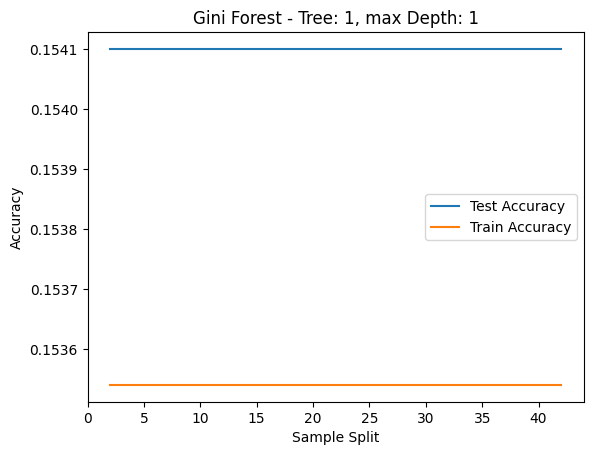

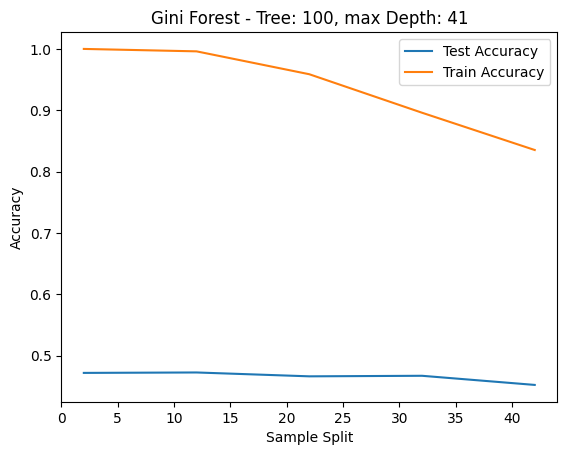

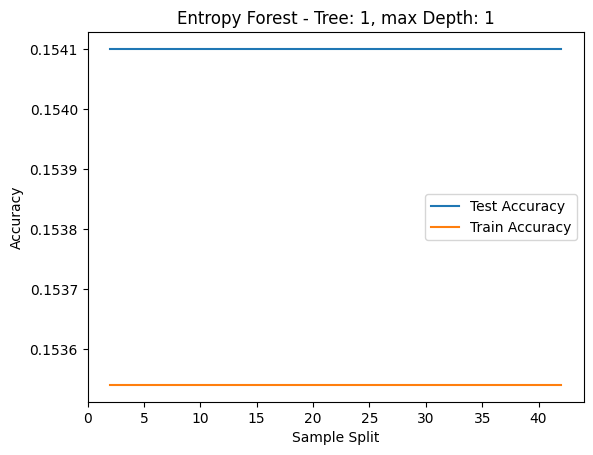

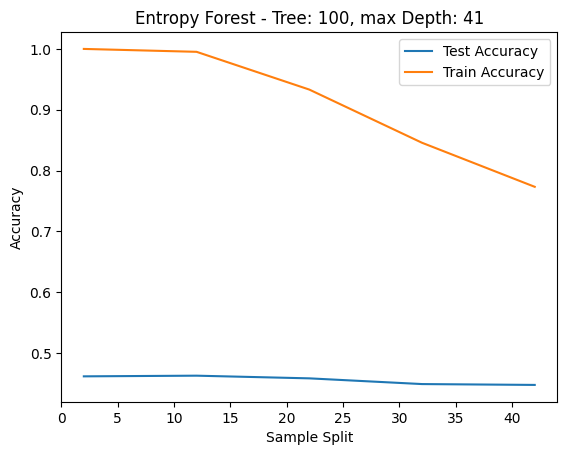

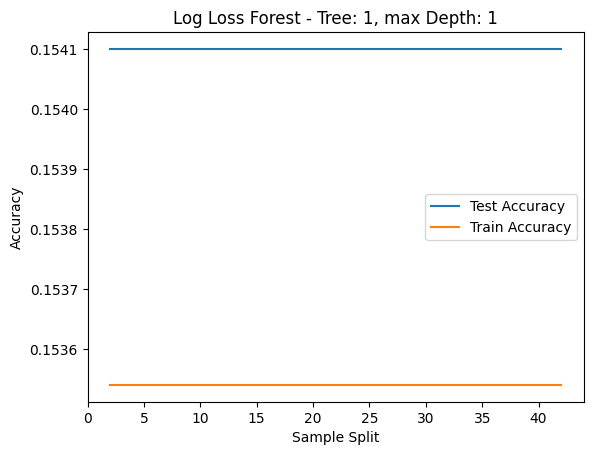

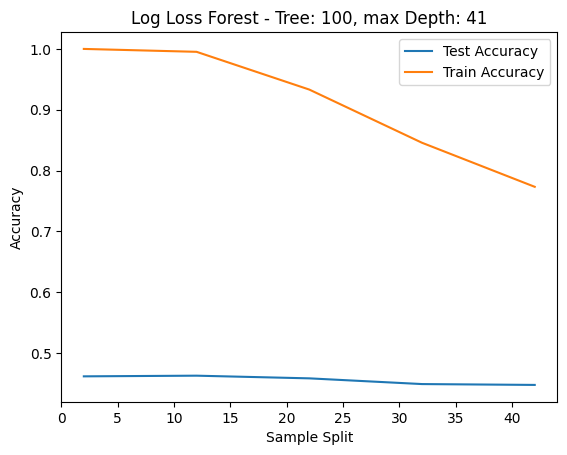

In [ ]:
def plotGraph(dataset, title):
  x = [item['min_sapmles_split'] for item in dataset]
  y1 = [item['accuracy'] for item in dataset]
  y2 = [item['trainAccuracy'] for item in dataset]

  plt.plot(x, y1)
  plt.plot(x, y2)
  plt.legend(['Test Accuracy','Train Accuracy'])

  plt.title(title)
  plt.xlabel("Sample Split")
  plt.ylabel("Accuracy")
  plt.show()

filteredDataset = [x for x in RF_report if x['criteria'] == 'gini']
subFilteredDataset = [x for x in filteredDataset if x['num_of_tress'] == 1]
sub2FilteredDataset = [x for x in subFilteredDataset if x['max_depth'] == 1]
plotGraph(sub2FilteredDataset, 'Gini Forest - Tree: 1, max Depth: 1')

filteredDataset = [x for x in RF_report if x['criteria'] == 'gini']
subFilteredDataset = [x for x in filteredDataset if x['num_of_tress'] == 100]
sub2FilteredDataset = [x for x in subFilteredDataset if x['max_depth'] == 41]
plotGraph(sub2FilteredDataset, 'Gini Forest - Tree: 100, max Depth: 41')

filteredDataset = [x for x in RF_report if x['criteria'] == 'entropy']
subFilteredDataset = [x for x in filteredDataset if x['num_of_tress'] == 1]
sub2FilteredDataset = [x for x in subFilteredDataset if x['max_depth'] == 1]
plotGraph(sub2FilteredDataset, 'Entropy Forest - Tree: 1, max Depth: 1')

filteredDataset = [x for x in RF_report if x['criteria'] == 'entropy']
subFilteredDataset = [x for x in filteredDataset if x['num_of_tress'] == 100]
sub2FilteredDataset = [x for x in subFilteredDataset if x['max_depth'] == 41]
plotGraph(sub2FilteredDataset, 'Entropy Forest - Tree: 100, max Depth: 41')

filteredDataset = [x for x in RF_report if x['criteria'] == 'log_loss']
subFilteredDataset = [x for x in filteredDataset if x['num_of_tress'] == 1]
sub2FilteredDataset = [x for x in subFilteredDataset if x['max_depth'] == 1]
plotGraph(sub2FilteredDataset, 'Log Loss Forest - Tree: 1, max Depth: 1')

filteredDataset = [x for x in RF_report if x['criteria'] == 'log_loss']
subFilteredDataset = [x for x in filteredDataset if x['num_of_tress'] == 100]
sub2FilteredDataset = [x for x in subFilteredDataset if x['max_depth'] == 41]
plotGraph(sub2FilteredDataset, 'Log Loss Forest - Tree: 100, max Depth: 41')

Softmax using Neural Networks

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

print(x_train.shape, y_train.shape)

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='softmax', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

Convolutional Neural Networks(CNN)

In [ ]:
cnnReport = []

def performCNN(myOptimizer, myLearningRate, myLoss, myMomentum, myBeta, myRho ):
  x_train, y_train, x_test, y_test = getData(True)

  if myLoss == 'categorical_crossentropy':
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
  else:
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

  # Create a CNN model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.001)
  if myOptimizer == 'sgd':
    o = tf.keras.optimizers.SGD(learning_rate=myLearningRate, momentum=myMomentum)
  if myOptimizer == 'adam':
    o = tf.keras.optimizers.Adam(learning_rate=myLearningRate, beta_1=myBeta)
  if myOptimizer == 'rmsprop':
    o = tf.keras.optimizers.RMSprop(learning_rate=myLearningRate, rho=myRho)

  # Compile the model
  model.compile(loss=myLoss, optimizer=o, metrics=['accuracy'] )

  # Train the model
  model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

  # Evaluate the train
  loss_train, accuracynn_train = model.evaluate(x_test, y_test)
  # print('Test accuracy:', accuracynn_train)

  # Evaluate the model
  loss_test, accuracynn = model.evaluate(x_test, y_test)
  # print('Test accuracy:', accuracynn)

  record = {
      'optimizer': myOptimizer,
      'learningRate': myLearningRate,
      'loss': myLoss,
      'momentum': myMomentum,
      'beta': myBeta,
      'rho': myRho,
      'accuracy': accuracynn,
      'trainAccuracy': accuracynn_train
  }

  cnnReport.append(record)
  print(cnnReport)

optimizer=[  'rmsprop', 'sgd', 'adam']
learning_rates=[0.1, 0.01,0.001, 0.0001]
losses = ['categorical_crossentropy', 'sparse_categorical_crossentropy']
momentums = [0, 0.5, 1]
beta1 = [0.8,0.9, 0.99]
rho = [0.8,0.9, 0.99]

for o in optimizer:
  for lo in losses:
    for l in learning_rates:
      if o == 'sgd':
        for m in momentums:
          performCNN( o, l, lo, m, None, None )
      elif o == 'adam':
        for b in beta1:
          performCNN( o, l, lo, None, b, None)
      else:
        for r in rho:
          performCNN( o, l, lo, None, None, r )

print(cnnReport)

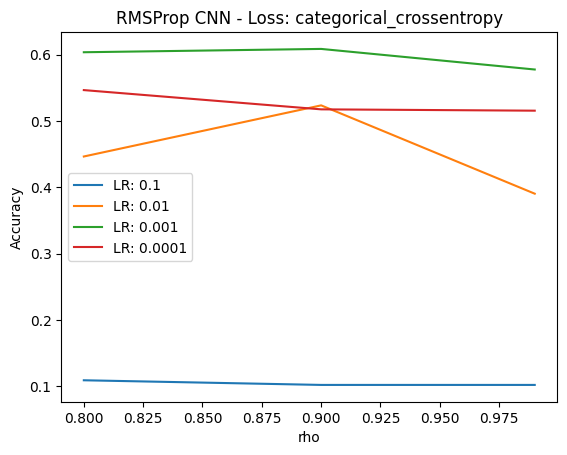

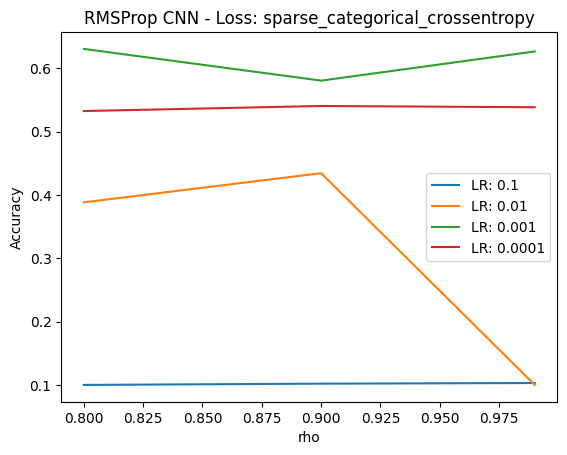

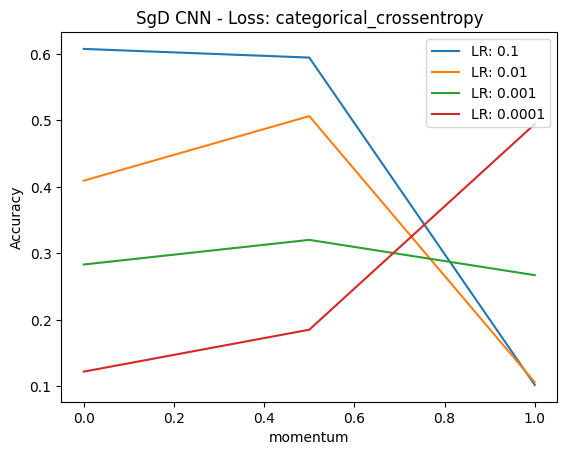

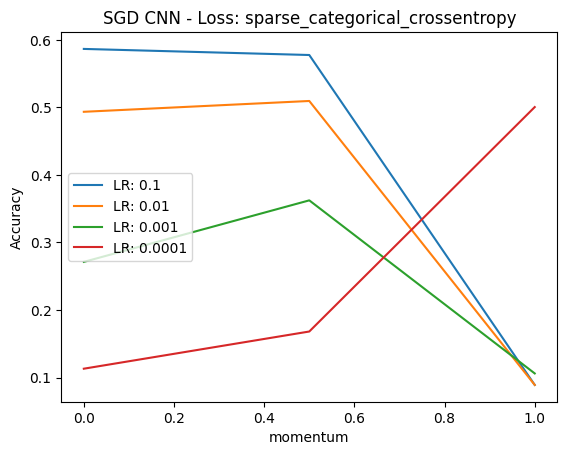

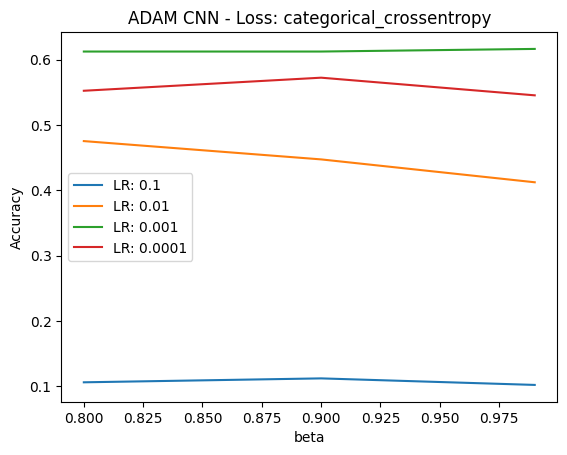

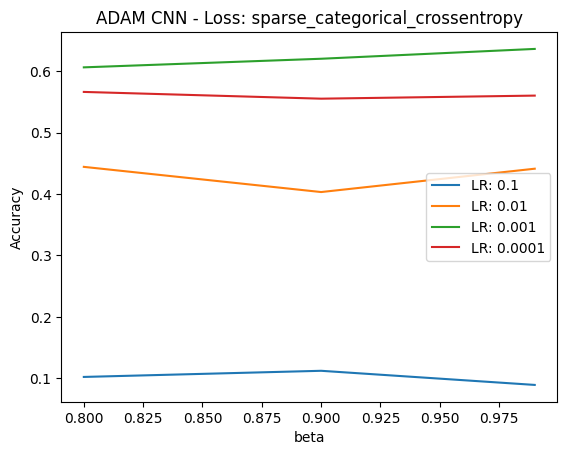

In [ ]:
cnn_report = [{'optimizer': 'rmsprop', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.10910911113023758, 'trainAccuracy': 0.10910911113023758}, {'optimizer': 'rmsprop', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.9, 'accuracy': 0.10210210084915161, 'trainAccuracy': 0.10210210084915161}, {'optimizer': 'rmsprop', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.99, 'accuracy': 0.10210210084915161, 'trainAccuracy': 0.10210210084915161}, {'optimizer': 'rmsprop', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.4464464485645294, 'trainAccuracy': 0.4464464485645294}, {'optimizer': 'rmsprop', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.9, 'accuracy': 0.5235235095024109, 'trainAccuracy': 0.5235235095024109}, {'optimizer': 'rmsprop', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.99, 'accuracy': 0.39039039611816406, 'trainAccuracy': 0.39039039611816406}, {'optimizer': 'rmsprop', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.6036036014556885, 'trainAccuracy': 0.6036036014556885}, {'optimizer': 'rmsprop', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.9, 'accuracy': 0.608608603477478, 'trainAccuracy': 0.608608603477478}, {'optimizer': 'rmsprop', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.99, 'accuracy': 0.5775775909423828, 'trainAccuracy': 0.5775775909423828}, {'optimizer': 'rmsprop', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.5465465188026428, 'trainAccuracy': 0.5465465188026428}, {'optimizer': 'rmsprop', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.9, 'accuracy': 0.5175175070762634, 'trainAccuracy': 0.5175175070762634}, {'optimizer': 'rmsprop', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.99, 'accuracy': 0.5155155062675476, 'trainAccuracy': 0.5155155062675476}, {'optimizer': 'rmsprop', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.10010010004043579, 'trainAccuracy': 0.10010010004043579}, {'optimizer': 'rmsprop', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.9, 'accuracy': 0.10210210084915161, 'trainAccuracy': 0.10210210084915161}, {'optimizer': 'rmsprop', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.99, 'accuracy': 0.10310310125350952, 'trainAccuracy': 0.10310310125350952}, {'optimizer': 'rmsprop', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.38838839530944824, 'trainAccuracy': 0.38838839530944824}, {'optimizer': 'rmsprop', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.9, 'accuracy': 0.4344344437122345, 'trainAccuracy': 0.4344344437122345}, {'optimizer': 'rmsprop', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.99, 'accuracy': 0.10010010004043579, 'trainAccuracy': 0.10010010004043579}, {'optimizer': 'rmsprop', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.630630612373352, 'trainAccuracy': 0.630630612373352}, {'optimizer': 'rmsprop', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.9, 'accuracy': 0.5805805921554565, 'trainAccuracy': 0.5805805921554565}, {'optimizer': 'rmsprop', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.99, 'accuracy': 0.6266266107559204, 'trainAccuracy': 0.6266266107559204}, {'optimizer': 'rmsprop', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.5325325131416321, 'trainAccuracy': 0.5325325131416321}, {'optimizer': 'rmsprop', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.9, 'accuracy': 0.5405405163764954, 'trainAccuracy': 0.5405405163764954}, {'optimizer': 'rmsprop', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.99, 'accuracy': 0.5385385155677795, 'trainAccuracy': 0.5385385155677795},{'optimizer': 'adam', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.8, 'rho': None, 'accuracy': 0.10610610246658325, 'trainAccuracy': 0.10610610246658325}, {'optimizer': 'adam', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.9, 'rho': None, 'accuracy': 0.11211211234331131, 'trainAccuracy': 0.11211211234331131}, {'optimizer': 'adam', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.10210210084915161, 'trainAccuracy': 0.10210210084915161}, {'optimizer': 'adam', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.8, 'rho': None, 'accuracy': 0.4754754900932312, 'trainAccuracy': 0.4754754900932312}, {'optimizer': 'adam', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.9, 'rho': None, 'accuracy': 0.44744744896888733, 'trainAccuracy': 0.44744744896888733}, {'optimizer': 'adam', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.4124124050140381, 'trainAccuracy': 0.4124124050140381}, {'optimizer': 'adam', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.8, 'rho': None, 'accuracy': 0.6126126050949097, 'trainAccuracy': 0.6126126050949097}, {'optimizer': 'adam', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.9, 'rho': None, 'accuracy': 0.6126126050949097, 'trainAccuracy': 0.6126126050949097}, {'optimizer': 'adam', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.6166166067123413, 'trainAccuracy': 0.6166166067123413}, {'optimizer': 'adam', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.8, 'rho': None, 'accuracy': 0.5525525808334351, 'trainAccuracy': 0.5525525808334351}, {'optimizer': 'adam', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.9, 'rho': None, 'accuracy': 0.5725725889205933, 'trainAccuracy': 0.5725725889205933}, {'optimizer': 'adam', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.5455455183982849, 'trainAccuracy': 0.5455455183982849}, {'optimizer': 'adam', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.8, 'rho': None, 'accuracy': 0.10210210084915161, 'trainAccuracy': 0.10210210084915161}, {'optimizer': 'adam', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.9, 'rho': None, 'accuracy': 0.11211211234331131, 'trainAccuracy': 0.11211211234331131}, {'optimizer': 'adam', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.08908908814191818, 'trainAccuracy': 0.08908908814191818}, {'optimizer': 'adam', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.8, 'rho': None, 'accuracy': 0.4444444477558136, 'trainAccuracy': 0.4444444477558136}, {'optimizer': 'adam', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.9, 'rho': None, 'accuracy': 0.4034034013748169, 'trainAccuracy': 0.4034034013748169}, {'optimizer': 'adam', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.44144144654273987, 'trainAccuracy': 0.44144144654273987}, {'optimizer': 'adam', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.8, 'rho': None, 'accuracy': 0.6066066026687622, 'trainAccuracy': 0.6066066026687622}, {'optimizer': 'adam', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.9, 'rho': None, 'accuracy': 0.620620608329773, 'trainAccuracy': 0.620620608329773}, {'optimizer': 'adam', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.6366366147994995, 'trainAccuracy': 0.6366366147994995}, {'optimizer': 'adam', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.8, 'rho': None, 'accuracy': 0.5665665864944458, 'trainAccuracy': 0.5665665864944458}, {'optimizer': 'adam', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.9, 'rho': None, 'accuracy': 0.5555555820465088, 'trainAccuracy': 0.5555555820465088}, {'optimizer': 'adam', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.5605605840682983, 'trainAccuracy': 0.5605605840682983},{'optimizer': 'sgd', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.6076076030731201, 'trainAccuracy': 0.6076076030731201}, {'optimizer': 'sgd', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': 0.5, 'beta': None, 'rho': None, 'accuracy': 0.5945945978164673, 'trainAccuracy': 0.5945945978164673}, {'optimizer': 'sgd', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': 1, 'beta': None, 'rho': None, 'accuracy': 0.10210210084915161, 'trainAccuracy': 0.10210210084915161}, {'optimizer': 'sgd', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.40940940380096436, 'trainAccuracy': 0.40940940380096436}, {'optimizer': 'sgd', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': 0.5, 'beta': None, 'rho': None, 'accuracy': 0.5065065026283264, 'trainAccuracy': 0.5065065026283264}, {'optimizer': 'sgd', 'learningRate': 0.01, 'loss': 'categorical_crossentropy', 'momentum': 1, 'beta': None, 'rho': None, 'accuracy': 0.10610610246658325, 'trainAccuracy': 0.10610610246658325}, {'optimizer': 'sgd', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.2832832932472229, 'trainAccuracy': 0.2832832932472229}, {'optimizer': 'sgd', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': 0.5, 'beta': None, 'rho': None, 'accuracy': 0.3203203082084656, 'trainAccuracy': 0.3203203082084656}, {'optimizer': 'sgd', 'learningRate': 0.001, 'loss': 'categorical_crossentropy', 'momentum': 1, 'beta': None, 'rho': None, 'accuracy': 0.26726725697517395, 'trainAccuracy': 0.26726725697517395}, {'optimizer': 'sgd', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.12212212383747101, 'trainAccuracy': 0.12212212383747101}, {'optimizer': 'sgd', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': 0.5, 'beta': None, 'rho': None, 'accuracy': 0.18518517911434174, 'trainAccuracy': 0.18518517911434174}, {'optimizer': 'sgd', 'learningRate': 0.0001, 'loss': 'categorical_crossentropy', 'momentum': 1, 'beta': None, 'rho': None, 'accuracy': 0.4944944977760315, 'trainAccuracy': 0.4944944977760315}, {'optimizer': 'sgd', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.586586594581604, 'trainAccuracy': 0.586586594581604}, {'optimizer': 'sgd', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': 0.5, 'beta': None, 'rho': None, 'accuracy': 0.5775775909423828, 'trainAccuracy': 0.5775775909423828}, {'optimizer': 'sgd', 'learningRate': 0.1, 'loss': 'sparse_categorical_crossentropy', 'momentum': 1, 'beta': None, 'rho': None, 'accuracy': 0.08908908814191818, 'trainAccuracy': 0.08908908814191818}, {'optimizer': 'sgd', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.4934934973716736, 'trainAccuracy': 0.4934934973716736}, {'optimizer': 'sgd', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': 0.5, 'beta': None, 'rho': None, 'accuracy': 0.5095095038414001, 'trainAccuracy': 0.5095095038414001}, {'optimizer': 'sgd', 'learningRate': 0.01, 'loss': 'sparse_categorical_crossentropy', 'momentum': 1, 'beta': None, 'rho': None, 'accuracy': 0.08908908814191818, 'trainAccuracy': 0.08908908814191818}, {'optimizer': 'sgd', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.2712712585926056, 'trainAccuracy': 0.2712712585926056}, {'optimizer': 'sgd', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': 0.5, 'beta': None, 'rho': None, 'accuracy': 0.3623623549938202, 'trainAccuracy': 0.3623623549938202}, {'optimizer': 'sgd', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': 1, 'beta': None, 'rho': None, 'accuracy': 0.10610610246658325, 'trainAccuracy': 0.10610610246658325}, {'optimizer': 'sgd', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.11311311274766922, 'trainAccuracy': 0.11311311274766922}, {'optimizer': 'sgd', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': 0.5, 'beta': None, 'rho': None, 'accuracy': 0.16816817224025726, 'trainAccuracy': 0.16816817224025726}, {'optimizer': 'sgd', 'learningRate': 0.0001, 'loss': 'sparse_categorical_crossentropy', 'momentum': 1, 'beta': None, 'rho': None, 'accuracy': 0.500500500202179, 'trainAccuracy': 0.500500500202179}]

def plotGraph(dataset, title, yAttribute):
  x = [item[yAttribute] for item in dataset]

  s1 = [r for r in dataset if r['learningRate'] == 0.1]
  s2 = [r for r in dataset if r['learningRate'] == 0.01]
  s3 = [r for r in dataset if r['learningRate'] == 0.001]
  s4 = [r for r in dataset if r['learningRate'] == 0.0001]

  x1 = [item[yAttribute] for item in s1]
  x2 = [item[yAttribute] for item in s2]
  x3 = [item[yAttribute] for item in s3]
  x4 = [item[yAttribute] for item in s4]

  y1 = [item['accuracy'] for item in s1]
  y2 = [item['accuracy'] for item in s2]
  y3 = [item['accuracy'] for item in s3]
  y4 = [item['accuracy'] for item in s4]

  plt.plot(x1, y1)
  plt.plot(x2, y2)
  plt.plot(x3, y3)
  plt.plot(x4, y4)
  plt.legend(['LR: 0.1','LR: 0.01','LR: 0.001','LR: 0.0001'])

  plt.title(title)
  plt.xlabel(yAttribute)
  plt.ylabel("Accuracy")
  plt.show()

filteredDataset = [x for x in cnn_report if x['optimizer'] == 'rmsprop']
subFilteredDataset = [x for x in filteredDataset if x['loss'] == 'categorical_crossentropy']
plotGraph(subFilteredDataset, 'RMSProp CNN - Loss: categorical_crossentropy', 'rho')

filteredDataset = [x for x in cnn_report if x['optimizer'] == 'rmsprop']
subFilteredDataset = [x for x in filteredDataset if x['loss'] == 'sparse_categorical_crossentropy']
plotGraph(subFilteredDataset, 'RMSProp CNN - Loss: sparse_categorical_crossentropy', 'rho')

filteredDataset = [x for x in cnn_report if x['optimizer'] == 'sgd']
subFilteredDataset = [x for x in filteredDataset if x['loss'] == 'categorical_crossentropy']
plotGraph(subFilteredDataset, 'SgD CNN - Loss: categorical_crossentropy', 'momentum')

filteredDataset = [x for x in cnn_report if x['optimizer'] == 'sgd']
subFilteredDataset = [x for x in filteredDataset if x['loss'] == 'sparse_categorical_crossentropy']
plotGraph(subFilteredDataset, 'SGD CNN - Loss: sparse_categorical_crossentropy', 'momentum')

filteredDataset = [x for x in cnn_report if x['optimizer'] == 'adam']
subFilteredDataset = [x for x in filteredDataset if x['loss'] == 'categorical_crossentropy']
plotGraph(subFilteredDataset, 'ADAM CNN - Loss: categorical_crossentropy', 'beta')

filteredDataset = [x for x in cnn_report if x['optimizer'] == 'adam']
subFilteredDataset = [x for x in filteredDataset if x['loss'] == 'sparse_categorical_crossentropy']
plotGraph(subFilteredDataset, 'ADAM CNN - Loss: sparse_categorical_crossentropy', 'beta')


In [ ]:
def maxRecord(optimiserName, dataset):
  data = [ r for r in dataset if r['optimizer'] == optimiserName ]

  maxAccuracy = 0
  maxRecord = None
  for r in data:
    if r['accuracy'] > maxAccuracy:
      maxRecord = r
      maxAccuracy = r['accuracy']

  print(maxRecord)

maxRecord('adam', cnn_report)
maxRecord('sgd', cnn_report)
maxRecord('rmsprop', cnn_report)

{'optimizer': 'adam', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': 0.99, 'rho': None, 'accuracy': 0.6366366147994995, 'trainAccuracy': 0.6366366147994995}
{'optimizer': 'sgd', 'learningRate': 0.1, 'loss': 'categorical_crossentropy', 'momentum': 0, 'beta': None, 'rho': None, 'accuracy': 0.6076076030731201, 'trainAccuracy': 0.6076076030731201}
{'optimizer': 'rmsprop', 'learningRate': 0.001, 'loss': 'sparse_categorical_crossentropy', 'momentum': None, 'beta': None, 'rho': 0.8, 'accuracy': 0.630630612373352, 'trainAccuracy': 0.630630612373352}


In [ ]:
dataset = [{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 52, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 62, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 72, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 82, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 92, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.2874, 'trainAccuracy': 0.37704},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.2854, 'trainAccuracy': 0.37856},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.2779, 'trainAccuracy': 0.3646},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.2833, 'trainAccuracy': 0.3576},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.2766, 'trainAccuracy': 0.35988},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 52, 'accuracy': 0.2833, 'trainAccuracy': 0.3543},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 62, 'accuracy': 0.2887, 'trainAccuracy': 0.34766},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 72, 'accuracy': 0.2906, 'trainAccuracy': 0.34244},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 82, 'accuracy': 0.2891, 'trainAccuracy': 0.34124},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 92, 'accuracy': 0.2938, 'trainAccuracy': 0.34214},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.2574, 'trainAccuracy': 0.6897},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.2522, 'trainAccuracy': 0.53428},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.2627, 'trainAccuracy': 0.46726},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.2661, 'trainAccuracy': 0.43614},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.2716, 'trainAccuracy': 0.41544},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 52, 'accuracy': 0.2675, 'trainAccuracy': 0.39744},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 62, 'accuracy': 0.2795, 'trainAccuracy': 0.385},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 72, 'accuracy': 0.274, 'trainAccuracy': 0.3775},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 82, 'accuracy': 0.2866, 'trainAccuracy': 0.37456},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 92, 'accuracy': 0.2901, 'trainAccuracy': 0.36766},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.2388, 'trainAccuracy': 0.71906},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.2531, 'trainAccuracy': 0.54222},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.2633, 'trainAccuracy': 0.47404},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.2699, 'trainAccuracy': 0.44102},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.2734, 'trainAccuracy': 0.41818},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 52, 'accuracy': 0.2768, 'trainAccuracy': 0.40204},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 62, 'accuracy': 0.271, 'trainAccuracy': 0.38782},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 72, 'accuracy': 0.2774, 'trainAccuracy': 0.38256},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 82, 'accuracy': 0.2703, 'trainAccuracy': 0.3713},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 92, 'accuracy': 0.2746, 'trainAccuracy': 0.36778},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.2495, 'trainAccuracy': 0.72136},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.2453, 'trainAccuracy': 0.53922},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.2602, 'trainAccuracy': 0.47422},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.2556, 'trainAccuracy': 0.43518},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.2583, 'trainAccuracy': 0.41636},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 52, 'accuracy': 0.2677, 'trainAccuracy': 0.3986},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 62, 'accuracy': 0.2823, 'trainAccuracy': 0.38936},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 72, 'accuracy': 0.2725, 'trainAccuracy': 0.38006},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 82, 'accuracy': 0.2792, 'trainAccuracy': 0.37114},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 92, 'accuracy': 0.2807, 'trainAccuracy': 0.36844},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 2, 'accuracy': 0.2495, 'trainAccuracy': 0.72136},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 12, 'accuracy': 0.2453, 'trainAccuracy': 0.53922},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 22, 'accuracy': 0.2609, 'trainAccuracy': 0.47238},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 32, 'accuracy': 0.2556, 'trainAccuracy': 0.43518},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 42, 'accuracy': 0.2615, 'trainAccuracy': 0.41718},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 52, 'accuracy': 0.2677, 'trainAccuracy': 0.3986},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 62, 'accuracy': 0.2823, 'trainAccuracy': 0.38936},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 72, 'accuracy': 0.2751, 'trainAccuracy': 0.38464},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 82, 'accuracy': 0.2792, 'trainAccuracy': 0.37114},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 92, 'accuracy': 0.2807, 'trainAccuracy': 0.36844},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 2, 'accuracy': 0.2495, 'trainAccuracy': 0.72136},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 12, 'accuracy': 0.2453, 'trainAccuracy': 0.53922},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 22, 'accuracy': 0.2609, 'trainAccuracy': 0.47238},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 32, 'accuracy': 0.2556, 'trainAccuracy': 0.43518},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 42, 'accuracy': 0.2615, 'trainAccuracy': 0.41718},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 52, 'accuracy': 0.2677, 'trainAccuracy': 0.3986},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 62, 'accuracy': 0.2823, 'trainAccuracy': 0.38936},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 72, 'accuracy': 0.2711, 'trainAccuracy': 0.3822},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 82, 'accuracy': 0.2792, 'trainAccuracy': 0.37114},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 92, 'accuracy': 0.2807, 'trainAccuracy': 0.36844},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 2, 'accuracy': 0.2495, 'trainAccuracy': 0.72136},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 12, 'accuracy': 0.2453, 'trainAccuracy': 0.53922},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 22, 'accuracy': 0.2609, 'trainAccuracy': 0.47238},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 32, 'accuracy': 0.2556, 'trainAccuracy': 0.43518},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 42, 'accuracy': 0.2615, 'trainAccuracy': 0.41718},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 52, 'accuracy': 0.2677, 'trainAccuracy': 0.3986},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 62, 'accuracy': 0.2823, 'trainAccuracy': 0.38936},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 72, 'accuracy': 0.2711, 'trainAccuracy': 0.3822},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 82, 'accuracy': 0.2792, 'trainAccuracy': 0.37114},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 92, 'accuracy': 0.2807, 'trainAccuracy': 0.36844},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 2, 'accuracy': 0.2495, 'trainAccuracy': 0.72136},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 12, 'accuracy': 0.2453, 'trainAccuracy': 0.53922},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 22, 'accuracy': 0.2609, 'trainAccuracy': 0.47238},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 32, 'accuracy': 0.2556, 'trainAccuracy': 0.43518},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 42, 'accuracy': 0.2615, 'trainAccuracy': 0.41718},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 52, 'accuracy': 0.2677, 'trainAccuracy': 0.3986},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 62, 'accuracy': 0.2823, 'trainAccuracy': 0.38936},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 72, 'accuracy': 0.2711, 'trainAccuracy': 0.3822},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 82, 'accuracy': 0.2792, 'trainAccuracy': 0.37114},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 92, 'accuracy': 0.2807, 'trainAccuracy': 0.36844},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 2, 'accuracy': 0.2495, 'trainAccuracy': 0.72136},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 12, 'accuracy': 0.2453, 'trainAccuracy': 0.53922},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 22, 'accuracy': 0.2609, 'trainAccuracy': 0.47238},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 32, 'accuracy': 0.2556, 'trainAccuracy': 0.43518},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 42, 'accuracy': 0.2615, 'trainAccuracy': 0.41718},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 52, 'accuracy': 0.2677, 'trainAccuracy': 0.3986},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 62, 'accuracy': 0.2823, 'trainAccuracy': 0.38936},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 72, 'accuracy': 0.2711, 'trainAccuracy': 0.3822},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 82, 'accuracy': 0.2792, 'trainAccuracy': 0.37114},
{'num_of_tress': 1, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 92, 'accuracy': 0.2807, 'trainAccuracy': 0.36844},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 52, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 62, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 72, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 82, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 92, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.2694, 'trainAccuracy': 0.3954},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.2809, 'trainAccuracy': 0.38172},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.2717, 'trainAccuracy': 0.36254},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.2744, 'trainAccuracy': 0.35466},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.2761, 'trainAccuracy': 0.344},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 52, 'accuracy': 0.2716, 'trainAccuracy': 0.34148},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 62, 'accuracy': 0.2744, 'trainAccuracy': 0.33744},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 72, 'accuracy': 0.2793, 'trainAccuracy': 0.33506},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 82, 'accuracy': 0.2792, 'trainAccuracy': 0.33126},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 92, 'accuracy': 0.277, 'trainAccuracy': 0.32682},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.2441, 'trainAccuracy': 0.7132},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.2501, 'trainAccuracy': 0.52804},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.2551, 'trainAccuracy': 0.4427},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.2627, 'trainAccuracy': 0.40832},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.2577, 'trainAccuracy': 0.38628},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 52, 'accuracy': 0.2659, 'trainAccuracy': 0.36886},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 62, 'accuracy': 0.2683, 'trainAccuracy': 0.35766},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 72, 'accuracy': 0.2717, 'trainAccuracy': 0.35378},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 82, 'accuracy': 0.2812, 'trainAccuracy': 0.3505},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 92, 'accuracy': 0.2766, 'trainAccuracy': 0.33914},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.2617, 'trainAccuracy': 0.38536},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 52, 'accuracy': 0.2746, 'trainAccuracy': 0.37222},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 52, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 62, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 72, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 82, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 92, 'accuracy': 0.1541, 'trainAccuracy': 0.15354},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.2694, 'trainAccuracy': 0.3954},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.2809, 'trainAccuracy': 0.38172},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.2717, 'trainAccuracy': 0.36254},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.2744, 'trainAccuracy': 0.35466},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.2761, 'trainAccuracy': 0.344},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 52, 'accuracy': 0.2716, 'trainAccuracy': 0.34148},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 62, 'accuracy': 0.2744, 'trainAccuracy': 0.33744},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 72, 'accuracy': 0.2793, 'trainAccuracy': 0.33506},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 82, 'accuracy': 0.2792, 'trainAccuracy': 0.33126},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 92, 'accuracy': 0.277, 'trainAccuracy': 0.32682},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.2441, 'trainAccuracy': 0.7132},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.2501, 'trainAccuracy': 0.52804},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.2551, 'trainAccuracy': 0.4427},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.2627, 'trainAccuracy': 0.40832},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.2577, 'trainAccuracy': 0.38628},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 52, 'accuracy': 0.2659, 'trainAccuracy': 0.36886},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 62, 'accuracy': 0.2683, 'trainAccuracy': 0.35766},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 72, 'accuracy': 0.2717, 'trainAccuracy': 0.35378},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 82, 'accuracy': 0.2812, 'trainAccuracy': 0.3505},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 92, 'accuracy': 0.2766, 'trainAccuracy': 0.33914},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.2617, 'trainAccuracy': 0.38536},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 52, 'accuracy': 0.2746, 'trainAccuracy': 0.37222},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 61, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 71, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 81, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 2, 'accuracy': 0.242, 'trainAccuracy': 0.72214},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 12, 'accuracy': 0.2442, 'trainAccuracy': 0.53222},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 22, 'accuracy': 0.2539, 'trainAccuracy': 0.4477},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 32, 'accuracy': 0.2649, 'trainAccuracy': 0.40992},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 42, 'accuracy': 0.2677, 'trainAccuracy': 0.39106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 52, 'accuracy': 0.2703, 'trainAccuracy': 0.37032},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 62, 'accuracy': 0.2675, 'trainAccuracy': 0.3585},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 72, 'accuracy': 0.2727, 'trainAccuracy': 0.35452},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 82, 'accuracy': 0.2819, 'trainAccuracy': 0.35106},
{'num_of_tress': 1, 'criteria': 'log_loss', 'max_depth': 91, 'min_sapmles_split': 92, 'accuracy': 0.2781, 'trainAccuracy': 0.34312},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 52, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 62, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 72, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 82, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 92, 'accuracy': 0.1608, 'trainAccuracy': 0.16004},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.4413, 'trainAccuracy': 0.73644},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.4377, 'trainAccuracy': 0.70018},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.4371, 'trainAccuracy': 0.66834},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.4344, 'trainAccuracy': 0.63884},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.4294, 'trainAccuracy': 0.61936},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 52, 'accuracy': 0.4373, 'trainAccuracy': 0.60362},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 62, 'accuracy': 0.4342, 'trainAccuracy': 0.58744},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 72, 'accuracy': 0.4301, 'trainAccuracy': 0.57352},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 82, 'accuracy': 0.428, 'trainAccuracy': 0.56276},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 92, 'accuracy': 0.4235, 'trainAccuracy': 0.55118},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.4667, 'trainAccuracy': 0.99852},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.4698, 'trainAccuracy': 0.9895},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.4644, 'trainAccuracy': 0.94588},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.4582, 'trainAccuracy': 0.88034},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.4552, 'trainAccuracy': 0.82088},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 52, 'accuracy': 0.4474, 'trainAccuracy': 0.77066},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 62, 'accuracy': 0.4483, 'trainAccuracy': 0.73274},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 72, 'accuracy': 0.4447, 'trainAccuracy': 0.6987},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 82, 'accuracy': 0.4408, 'trainAccuracy': 0.66852},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 21, 'min_sapmles_split': 92, 'accuracy': 0.4387, 'trainAccuracy': 0.64484},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.4682, 'trainAccuracy': 0.99996},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.47, 'trainAccuracy': 0.99518},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.4644, 'trainAccuracy': 0.95658},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.4612, 'trainAccuracy': 0.89588},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.4557, 'trainAccuracy': 0.83364},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 52, 'accuracy': 0.4535, 'trainAccuracy': 0.78246},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 62, 'accuracy': 0.4474, 'trainAccuracy': 0.73928},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 72, 'accuracy': 0.4457, 'trainAccuracy': 0.70358},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 82, 'accuracy': 0.4452, 'trainAccuracy': 0.6729},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 31, 'min_sapmles_split': 92, 'accuracy': 0.4417, 'trainAccuracy': 0.6492},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.4718, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.4725, 'trainAccuracy': 0.99604},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.4662, 'trainAccuracy': 0.95874},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.4671, 'trainAccuracy': 0.89598},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.4522, 'trainAccuracy': 0.8352},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 52, 'accuracy': 0.4501, 'trainAccuracy': 0.78426},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 62, 'accuracy': 0.4452, 'trainAccuracy': 0.74146},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 72, 'accuracy': 0.4482, 'trainAccuracy': 0.70576},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 82, 'accuracy': 0.4418, 'trainAccuracy': 0.67544},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 41, 'min_sapmles_split': 92, 'accuracy': 0.4428, 'trainAccuracy': 0.64982},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 2, 'accuracy': 0.4654, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 12, 'accuracy': 0.4727, 'trainAccuracy': 0.99614},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 22, 'accuracy': 0.4646, 'trainAccuracy': 0.95906},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 32, 'accuracy': 0.4645, 'trainAccuracy': 0.89554},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 42, 'accuracy': 0.4535, 'trainAccuracy': 0.83464},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 52, 'accuracy': 0.4493, 'trainAccuracy': 0.78402},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 62, 'accuracy': 0.4449, 'trainAccuracy': 0.7412},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 72, 'accuracy': 0.449, 'trainAccuracy': 0.70514},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 82, 'accuracy': 0.4426, 'trainAccuracy': 0.6756},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 51, 'min_sapmles_split': 92, 'accuracy': 0.4423, 'trainAccuracy': 0.65006},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 2, 'accuracy': 0.4654, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 12, 'accuracy': 0.4737, 'trainAccuracy': 0.99606},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 22, 'accuracy': 0.4646, 'trainAccuracy': 0.95914},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 32, 'accuracy': 0.4645, 'trainAccuracy': 0.89554},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 42, 'accuracy': 0.4527, 'trainAccuracy': 0.83452},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 52, 'accuracy': 0.4493, 'trainAccuracy': 0.78402},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 62, 'accuracy': 0.4449, 'trainAccuracy': 0.7412},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 72, 'accuracy': 0.4469, 'trainAccuracy': 0.70494},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 82, 'accuracy': 0.4417, 'trainAccuracy': 0.67524},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 61, 'min_sapmles_split': 92, 'accuracy': 0.4419, 'trainAccuracy': 0.6502},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 2, 'accuracy': 0.4654, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 12, 'accuracy': 0.4737, 'trainAccuracy': 0.99606},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 22, 'accuracy': 0.4646, 'trainAccuracy': 0.95914},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 32, 'accuracy': 0.4645, 'trainAccuracy': 0.89554},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 42, 'accuracy': 0.4527, 'trainAccuracy': 0.83452},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 52, 'accuracy': 0.4493, 'trainAccuracy': 0.78402},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 62, 'accuracy': 0.4449, 'trainAccuracy': 0.7412},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 72, 'accuracy': 0.4469, 'trainAccuracy': 0.70494},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 82, 'accuracy': 0.4417, 'trainAccuracy': 0.67524},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 71, 'min_sapmles_split': 92, 'accuracy': 0.4419, 'trainAccuracy': 0.65014},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 2, 'accuracy': 0.4654, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 12, 'accuracy': 0.4737, 'trainAccuracy': 0.99606},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 22, 'accuracy': 0.4646, 'trainAccuracy': 0.95914},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 32, 'accuracy': 0.4645, 'trainAccuracy': 0.89554},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 42, 'accuracy': 0.4527, 'trainAccuracy': 0.83452},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 52, 'accuracy': 0.4493, 'trainAccuracy': 0.78402},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 62, 'accuracy': 0.4449, 'trainAccuracy': 0.7412},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 72, 'accuracy': 0.4469, 'trainAccuracy': 0.70494},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 82, 'accuracy': 0.4417, 'trainAccuracy': 0.67524},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 81, 'min_sapmles_split': 92, 'accuracy': 0.4419, 'trainAccuracy': 0.65014},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 2, 'accuracy': 0.4654, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 12, 'accuracy': 0.4737, 'trainAccuracy': 0.99606},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 22, 'accuracy': 0.4646, 'trainAccuracy': 0.95914},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 32, 'accuracy': 0.4645, 'trainAccuracy': 0.89554},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 42, 'accuracy': 0.4527, 'trainAccuracy': 0.83452},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 52, 'accuracy': 0.4493, 'trainAccuracy': 0.78402},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 62, 'accuracy': 0.4449, 'trainAccuracy': 0.7412},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 72, 'accuracy': 0.4469, 'trainAccuracy': 0.70494},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 82, 'accuracy': 0.4417, 'trainAccuracy': 0.67524},
{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 91, 'min_sapmles_split': 92, 'accuracy': 0.4419, 'trainAccuracy': 0.65014},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 52, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 62, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 72, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 82, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 1, 'min_sapmles_split': 92, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.4314, 'trainAccuracy': 0.7814},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.4335, 'trainAccuracy': 0.74422},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.4343, 'trainAccuracy': 0.69242},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.4317, 'trainAccuracy': 0.65362},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.4251, 'trainAccuracy': 0.61642},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 52, 'accuracy': 0.4217, 'trainAccuracy': 0.58834},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 62, 'accuracy': 0.4267, 'trainAccuracy': 0.56922},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 72, 'accuracy': 0.4198, 'trainAccuracy': 0.55272},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 82, 'accuracy': 0.4184, 'trainAccuracy': 0.53948},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 11, 'min_sapmles_split': 92, 'accuracy': 0.4156, 'trainAccuracy': 0.52796},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.4661, 'trainAccuracy': 0.99996},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.4689, 'trainAccuracy': 0.99348},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.4598, 'trainAccuracy': 0.93056},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.4522, 'trainAccuracy': 0.8437},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.4497, 'trainAccuracy': 0.7709},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 52, 'accuracy': 0.443, 'trainAccuracy': 0.71672},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 62, 'accuracy': 0.4388, 'trainAccuracy': 0.67478},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 72, 'accuracy': 0.4366, 'trainAccuracy': 0.64182},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 82, 'accuracy': 0.4341, 'trainAccuracy': 0.61466},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 21, 'min_sapmles_split': 92, 'accuracy': 0.4285, 'trainAccuracy': 0.59314},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.4626, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.4617, 'trainAccuracy': 0.99504},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.458, 'trainAccuracy': 0.93308},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.4476, 'trainAccuracy': 0.84584},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.4466, 'trainAccuracy': 0.77326},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 52, 'accuracy': 0.4449, 'trainAccuracy': 0.71858},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 62, 'accuracy': 0.4398, 'trainAccuracy': 0.6755},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 31, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 52, 'accuracy': 0.4454, 'trainAccuracy': 0.71792},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 62, 'accuracy': 0.4391, 'trainAccuracy': 0.67526},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 41, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 52, 'accuracy': 0.4454, 'trainAccuracy': 0.71792},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 62, 'accuracy': 0.4391, 'trainAccuracy': 0.67526},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 51, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 52, 'accuracy': 0.4454, 'trainAccuracy': 0.71792},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 62, 'accuracy': 0.4391, 'trainAccuracy': 0.67526},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 61, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 52, 'accuracy': 0.4454, 'trainAccuracy': 0.71792},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 62, 'accuracy': 0.4391, 'trainAccuracy': 0.67526},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 71, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 52, 'accuracy': 0.4454, 'trainAccuracy': 0.71792},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 62, 'accuracy': 0.4391, 'trainAccuracy': 0.67526},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 81, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 52, 'accuracy': 0.4454, 'trainAccuracy': 0.71792},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 62, 'accuracy': 0.4391, 'trainAccuracy': 0.67526},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'entropy', 'max_depth': 91, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 52, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 62, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 72, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 82, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 1, 'min_sapmles_split': 92, 'accuracy': 0.1614, 'trainAccuracy': 0.15998},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.4314, 'trainAccuracy': 0.7814},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.4335, 'trainAccuracy': 0.74422},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 22, 'accuracy': 0.4343, 'trainAccuracy': 0.69242},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 32, 'accuracy': 0.4317, 'trainAccuracy': 0.65362},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 42, 'accuracy': 0.4251, 'trainAccuracy': 0.61642},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 52, 'accuracy': 0.4217, 'trainAccuracy': 0.58834},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 62, 'accuracy': 0.4267, 'trainAccuracy': 0.56922},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 72, 'accuracy': 0.4198, 'trainAccuracy': 0.55272},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 82, 'accuracy': 0.4184, 'trainAccuracy': 0.53948},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 11, 'min_sapmles_split': 92, 'accuracy': 0.4156, 'trainAccuracy': 0.52796},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 2, 'accuracy': 0.4661, 'trainAccuracy': 0.99996},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 12, 'accuracy': 0.4689, 'trainAccuracy': 0.99348},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 22, 'accuracy': 0.4598, 'trainAccuracy': 0.93056},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 32, 'accuracy': 0.4522, 'trainAccuracy': 0.8437},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 42, 'accuracy': 0.4497, 'trainAccuracy': 0.7709},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 52, 'accuracy': 0.443, 'trainAccuracy': 0.71672},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 62, 'accuracy': 0.4388, 'trainAccuracy': 0.67478},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 72, 'accuracy': 0.4366, 'trainAccuracy': 0.64182},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 82, 'accuracy': 0.4341, 'trainAccuracy': 0.61466},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 21, 'min_sapmles_split': 92, 'accuracy': 0.4285, 'trainAccuracy': 0.59314},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 2, 'accuracy': 0.4626, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 12, 'accuracy': 0.4617, 'trainAccuracy': 0.99504},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 22, 'accuracy': 0.458, 'trainAccuracy': 0.93308},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 32, 'accuracy': 0.4476, 'trainAccuracy': 0.84584},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 42, 'accuracy': 0.4466, 'trainAccuracy': 0.77326},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 52, 'accuracy': 0.4449, 'trainAccuracy': 0.71858},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 62, 'accuracy': 0.4398, 'trainAccuracy': 0.6755},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 31, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 52, 'accuracy': 0.4454, 'trainAccuracy': 0.71792},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 62, 'accuracy': 0.4391, 'trainAccuracy': 0.67526},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 72, 'accuracy': 0.4384, 'trainAccuracy': 0.64196},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 82, 'accuracy': 0.4342, 'trainAccuracy': 0.61714},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 41, 'min_sapmles_split': 92, 'accuracy': 0.4293, 'trainAccuracy': 0.59568},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 2, 'accuracy': 0.4617, 'trainAccuracy': 1.0},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 12, 'accuracy': 0.4628, 'trainAccuracy': 0.99524},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 22, 'accuracy': 0.4584, 'trainAccuracy': 0.93318},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 32, 'accuracy': 0.449, 'trainAccuracy': 0.84572},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 42, 'accuracy': 0.4476, 'trainAccuracy': 0.7733},
{'num_of_tress': 100, 'criteria': 'log_loss', 'max_depth': 51, 'min_sapmles_split': 52, 'accuracy': 0.4454, 'trainAccuracy': 0.71792}]

In [ ]:
filteredDataset = [x for x in dataset if x['max_depth'] < 50 and x['min_sapmles_split'] < 50 and x['num_of_tress'] == 100 ]
print(filteredDataset)

def maxRecord(optimiserName, dataset):
  data = [ r for r in dataset if r['criteria'] == optimiserName ]

  maxAccuracy = 0
  maxRecord = None
  for r in data:
    if r['accuracy'] > maxAccuracy:
      maxRecord = r
      maxAccuracy = r['accuracy']

  print(maxRecord)

maxRecord('gini', filteredDataset )
maxRecord('log_loss', filteredDataset )
maxRecord('entropy', filteredDataset )

[{'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 2, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 12, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 22, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 32, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 1, 'min_sapmles_split': 42, 'accuracy': 0.1608, 'trainAccuracy': 0.16004}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 2, 'accuracy': 0.4413, 'trainAccuracy': 0.73644}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 12, 'accuracy': 0.4377, 'trainAccuracy': 0.70018}, {'num_of_tress': 100, 'criteria': 'gini', 'max_depth': 11, 'min_sapmles_split': 22, 'accu